###**Importing Libraries**

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

###**Downloading Walmart Monthly Stock Data**

In [2]:
wmt = yf.download('WMT',start='2010-01-01',end='2019-12-31',interval='1mo')
wmt

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,WMT,WMT,WMT,WMT,WMT,WMT
Date,,,,,,
2010-01-01 00:00:00+00:00,12.919970,17.809999,18.400000,17.503332,17.913334,874774500
2010-02-01 00:00:00+00:00,13.074725,18.023333,18.166668,17.553333,17.873333,835515000
2010-03-01 00:00:00+00:00,13.444695,18.533333,18.756666,17.716667,18.013332,812293200
2010-04-01 00:00:00+00:00,13.043855,17.879999,18.633333,17.840000,18.583332,848853300
2010-05-01 00:00:00+00:00,12.294880,16.853333,18.316668,16.666668,17.959999,1194357000
...,...,...,...,...,...,...
2019-08-01 00:00:00+00:00,35.082733,38.086666,38.459999,34.946667,36.773335,473622600
2019-09-01 00:00:00+00:00,36.619247,39.560001,39.953335,37.830002,37.893333,316087500


###**Focusing on Adjusted Close Price**


In [3]:
wmt = wmt['Adj Close']
wmt

Ticker,WMT
Date,
2010-01-01 00:00:00+00:00,12.919970
2010-02-01 00:00:00+00:00,13.074725
2010-03-01 00:00:00+00:00,13.444695
2010-04-01 00:00:00+00:00,13.043855
2010-05-01 00:00:00+00:00,12.294880
...,...
2019-08-01 00:00:00+00:00,35.082733
2019-09-01 00:00:00+00:00,36.619247
2019-10-01 00:00:00+00:00,36.181080


###**Getting Perentage Returns**

In [4]:
returns = wmt.pct_change()
returns.dropna(inplace=True)
returns

Ticker,WMT
Date,
2010-02-01 00:00:00+00:00,0.011978
2010-03-01 00:00:00+00:00,0.028297
2010-04-01 00:00:00+00:00,-0.029814
2010-05-01 00:00:00+00:00,-0.057420
2010-06-01 00:00:00+00:00,-0.043725
...,...
2019-08-01 00:00:00+00:00,0.035151
2019-09-01 00:00:00+00:00,0.043797
2019-10-01 00:00:00+00:00,-0.011965


###**Graphing Returns**

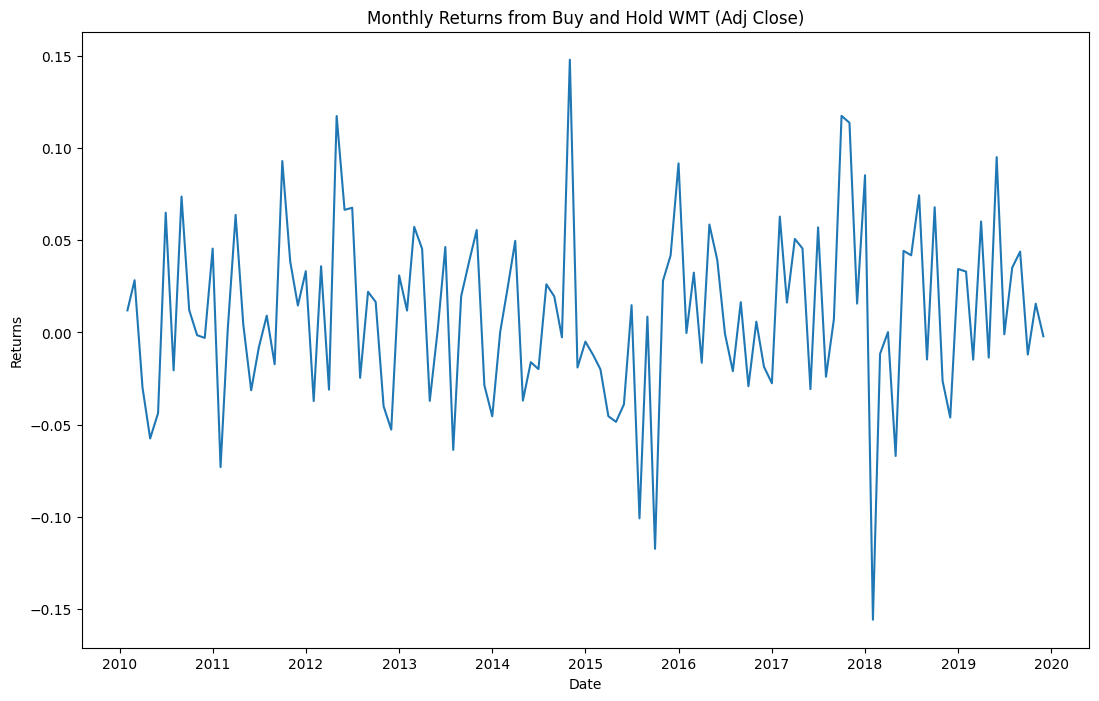

In [5]:
plt.figure(figsize=(13,8))
plt.plot(returns.index, returns)
plt.title("Monthly Returns from Buy and Hold WMT (Adj Close)")
plt.xlabel('Date')
plt.ylabel('Returns')
plt.show()

###**Let's calculate and graph the Cumulative Returns**
The cumulative returns shows the total growht of wealth of the investment over time.

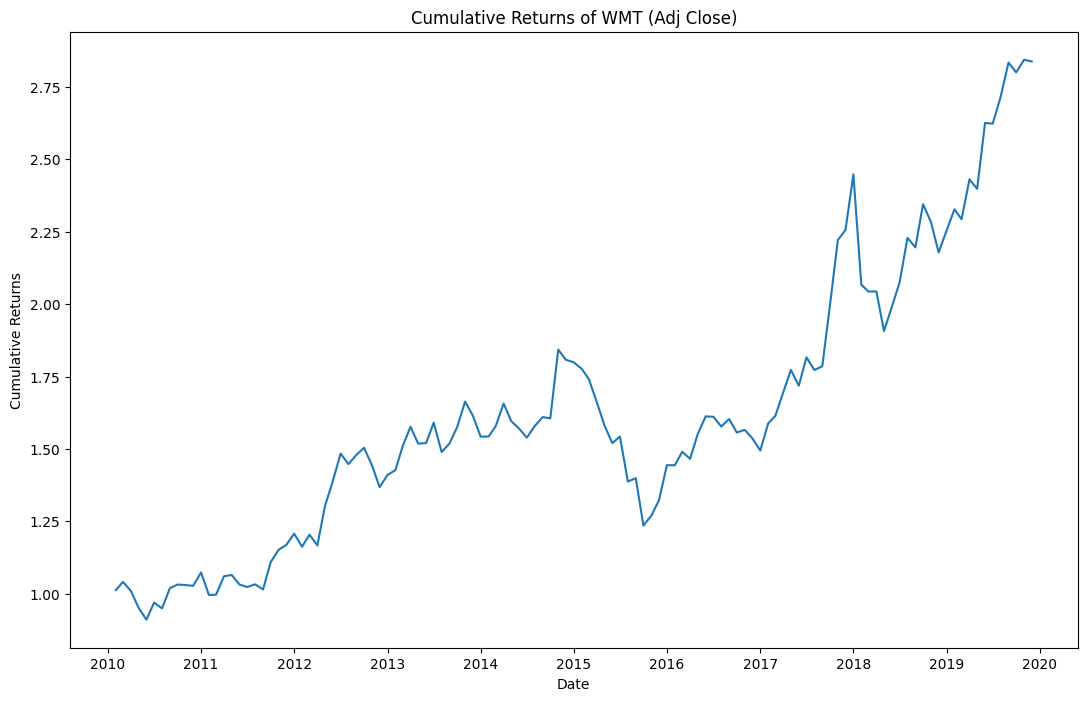

In [6]:
cumulative_returns = (1+returns).cumprod()  ## calculating the cumulative product of returns for each month

## Graphing
plt.figure(figsize=(13,8))
plt.plot(cumulative_returns.index, cumulative_returns)
plt.title("Cumulative Returns of WMT (Adj Close)")
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.show()

###**Let's get the Sharpe Ratio Formula**

$ \text{Sharpe Ratio} = \frac{R_p - R_f}{\sigma_p} $

where

$R_p = \text{returns of the asset} $

$R_f = \text{risk-free asset} $

$\sigma_p = \text{standard deviation}$

$\text{monthly risk-free rate} = (1 + R_f)^{1/12}-1$

*Considering 252 working days

In [7]:
risk_free = 0.02  ## Setting risk-free rate as 2% per year
monthly_risk_free = (1 + risk_free) ** (1/12) - 1  ## Monthly risk-free rate
average_return = returns.mean().item() ## Expected returns of the stock
std_deviation = returns.std().item()  ##  Standard Deviation of the returns

## Sharpe Ratio Formula

sharpe_ratio = (average_return - monthly_risk_free)/std_deviation
annual_sharpe_ratio = sharpe_ratio *(12**0.5)

print(f"Sharpe Ratio: {sharpe_ratio}")
print(f"Annual Sharpe Ratio: {annual_sharpe_ratio}")

Sharpe Ratio: 0.17206018789690045
Annual Sharpe Ratio: 0.5960339747945583


Sharpe Ratio above shows the average of well an investment performed given its risk. Alternatively, we can calculate a rolling Sharpe Ratio to observe the Sharpe Ratio month-by-month.

###**Rolling Sharpe Ratio**

We will analyze the Sharpe Ratio of each month.

Highest Sharpe Ratio: 0.8574913687588608
Highest Sharpe Ratio Point: 2018-01-01 00:00:00+00:00


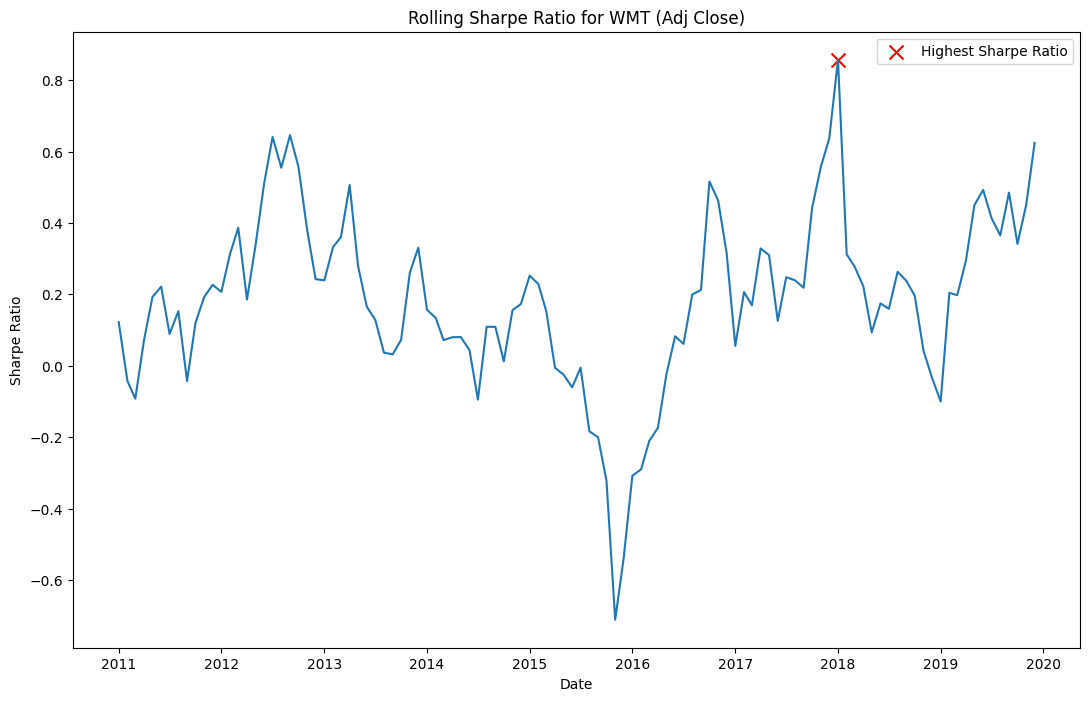

In [18]:
rolling_window = 12  ## 12 months per year
rolling_average_return = returns.rolling(rolling_window).mean()  ## Getting the average of each month
rolling_std_deviation = returns.rolling(rolling_window).std()  ## Getting the std of each month

# Rolling Sharpe Ratio
rolling_sharpe_ratio = (rolling_average_return - monthly_risk_free) / rolling_std_deviation

rolling_sharpe_idx = rolling_sharpe_ratio.idxmax()  ## Getting the point of the highest sharpe ratio
highest_sharpe_value = rolling_sharpe_ratio.max()   ## Getting the value of the highest sharpe ratio

print(f"Highest Sharpe Ratio: {highest_sharpe_value.item()}")
print(f"Highest Sharpe Ratio Point: {rolling_sharpe_idx.item()}")


#Graphing
plt.figure(figsize=(13,8))
plt.plot(rolling_sharpe_ratio.index, rolling_sharpe_ratio)
plt.scatter(rolling_sharpe_idx, highest_sharpe_value, color='r', marker='x', s=100, label="Highest Sharpe Ratio")
plt.legend()
plt.title("Rolling Sharpe Ratio for WMT (Adj Close)")
plt.xlabel('Date')
plt.ylabel('Sharpe Ratio')
plt.show()

*This is for the sharpe ratio only, not the annual sharpe ratio. We could also do the same for the annual.

###**Calculating and Graphing Drawdowns**
Drawdown refers to the moment of the greatest loss for a given period of time while investing in the asset. It should give an idea of the maximum an investor could possibly lose or would be willing to lose for that given asset.

In our case, the period is monthly, so we are calculating the drawdown for each month.

Maximum Drawdown: -0.3298053577781627
Maximum Drawdown Point: 2015-10-01 00:00:00+00:00


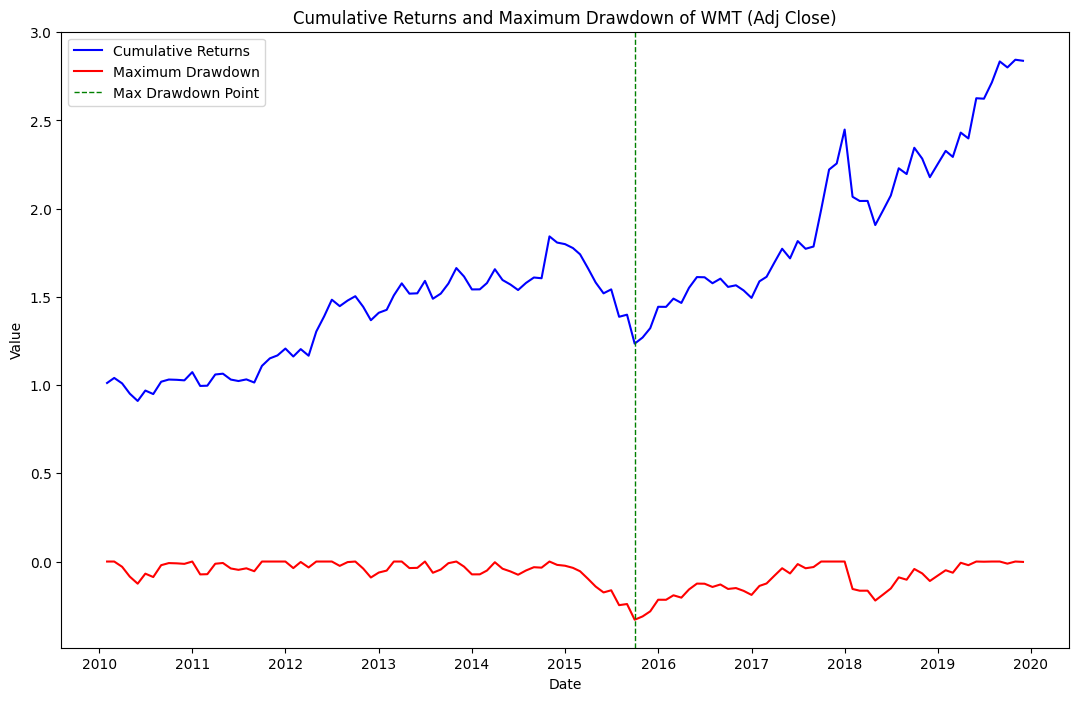

In [13]:
running_max = cumulative_returns.cummax()  ## Getting running maximum
drawdown = (cumulative_returns - running_max) / running_max  ## Calculating drawdown

max_drawdown_idx = drawdown.idxmin() ## Identifying the point of the lowest drawdown
print(f"Maximum Drawdown: {drawdown.min().item()}")
print(f"Maximum Drawdown Point: {max_drawdown_idx.item()}")

## Graphing

plt.figure(figsize=(13,8))
plt.plot(cumulative_returns.index, cumulative_returns, label="Cumulative Returns", color='b')
plt.plot(drawdown.index, drawdown, label='Maximum Drawdown', color='r')
plt.axvline(x=max_drawdown_idx, color='g', linestyle='--', linewidth=1, label="Max Drawdown Point")
plt.title("Cumulative Returns and Maximum Drawdown of WMT (Adj Close)")
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()